In [ ]:
from typing import Generator

# Método de Cuadrados Medios (Mid-Square)

El **método Mid-Square** es un algoritmo de generación de números pseudoaleatorios. Consiste en un procedimiento iterativo en el que, a partir de un número inicial (semilla), se obtiene el siguiente número de la secuencia elevando al cuadrado el número actual y extrayendo los dígitos centrales del resultado. 

## Funcionamiento

Primero, se elige una semilla de $k$ dígitos, este tiende a ser par para definir claramente los dígitos centrales. Luego se toma esta semilla y se eleva al cuadrado, obteniendo un número de hasta $2k$ dígitos. Si el resultado tiene menos que $2k$ dígitos, se añaden ceros a la izquierda. 

Luego se extraen del resultado los $k$ dígitos centrales del resultado: estos serán el siguiente número pseudoaleatorio de la secuencia. Se repite el proceso usando el número número como semilla. 

In [ ]:
class MidSquareGenerator:
  def __init__(self, seed:int, k:int) -> None:
    """Inicializa el generador mid-square

    Args:
      seed (int): semilla inicial 
      k (int): parámetro que determina el tamaño de la semilla
    """
    self.original = seed 
    self.k = k
    self.seed_length = 2*k
    self.current = self._validate_seed(seed)
  
  def _validate_seed(self, seed:int) -> int:
    "Valida y modifica (en caso de ser necesario) la semilla para que tenga exactamente 2k dígitos"
    seed_str = str(seed)
    
    # si la semilla es más corta, agregar ceros a la izquierda
    if len(seed_str) < self.seed_length:
      seed_str = seed_str.zfill(self.seed_length)
    
    # si la semilla es más larga, tomar solo los primeros 2k dígitos
    elif len(seed_str) > self.seed_length:
      seed_str = seed_str[:self.seed_length]

    return int(seed_str)
  
  def next(self):
    "Genera el siguiente número pseudoaleatorio usando el método mid-square"
    squared = self.current ** 2
    squared_str = str(squared)
    
    # asegurar que el número al cuadrado tenga exactamente 2k dígitos
    # si es menor, agregar ceros a la izquierda
    if len(squared_str) < self.seed_length:
      squared_str = squared_str.zfill(self.seed_length)
    
    # extraer la subcadena intermedia de longitud 2k
    start_index = self.k // 2
    end_index = start_index + self.k
    middle_substring = squared_str[start_index:end_index]
    
    # actualizar el valor actual 
    self.current = int(middle_substring)
    return self.current
  
  def __call__(self, k:int) -> Generator:
    "Genera k números pseudoaleatorios"
    for _ in range(k):
      yield self.next()
  
  def reset(self) -> None:
    "Reinicia el generador"
    self.current = self.original

A pesar de simplicidad y velocidad para obtener números pseudoaleatorios tiene sus **desventajas**, tales como:
- *Descomposición a cero*: si en algún momento los dígitos centrales son todos ceros, la secuencia queda atrapada en ceros para siempre.
- *Ciclos y puntos fijos*: el método puede caer rápidamente en ciclos cortos o puntos fijos (números que se repiten indefinidamente). Por ejemplo, para $k = 4$, los valores $0100$, $2500$, $3792$, $7600$ son puntos fijos.

In [ ]:
generator = MidSquareGenerator( 4321, 4 )
for i,new_number in enumerate(generator( 10 )):
  print(f"{i+1}) {new_number}")

Se definirá ahora una función para visualizar la distribución de los valores generados por el método Mid-Square. Este permite ver las desventajas conocidas de este generador. Analizar la frecuencia de aparición de los números facilita detectar si el generador produce secuencias poco aleatorias o si cae en ciclos cortos, lo cual es fundamental para evaluar la calidad del método.

In [28]:
import matplotlib.pyplot as plt

def plot_midsquare_hist(seed: int, k: int, N: int):
  gen = MidSquareGenerator(seed, k)
  data = list(gen(N))
  plt.figure(figsize=(12,5))
  plt.hist(data, bins=30)
  plt.xlabel("Valor generado")
  plt.ylabel("Frecuencia")
  plt.title(f"Histograma Mid-Square: seed={seed} - {N} iteraciones")
  plt.show()

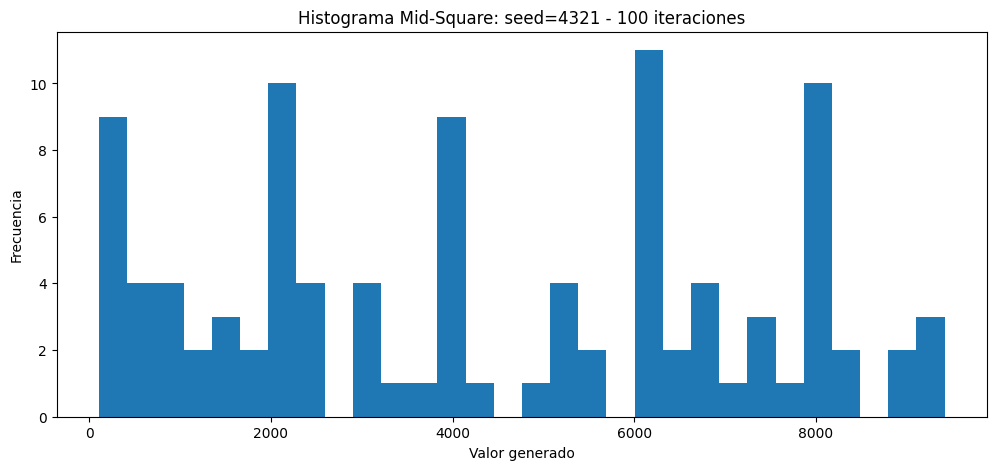

In [30]:
plot_midsquare_hist(4321, 4, 100)

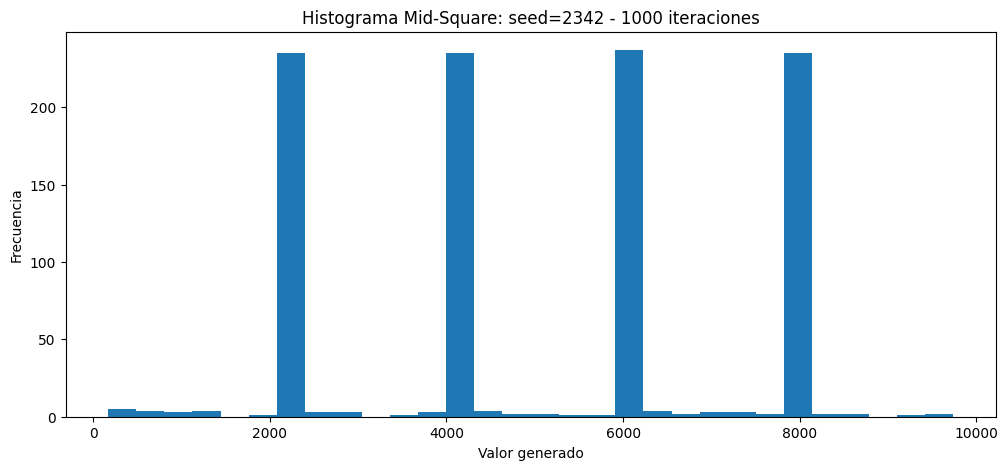

In [34]:
plot_midsquare_hist(2342, 4, 1000)